

# Abstract Facotry

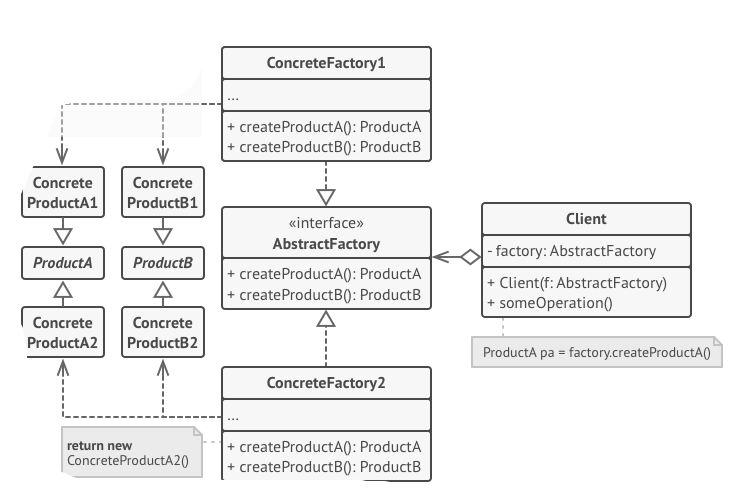

1. Permite a definição de uma factory abstrata que é herdade em diferentes classes que geram objetos de famílias específicas.
2. No entanto, esses objetos herdam de uma mesma classe abstrata e são tratados de forma semelhante.
3. Ou seja, apesar de retornarem objetos diferentes, os códigos de ambas as fábricas são utilizados da mesma mandeira pelo cliente

In [18]:
from abc import ABC, abstractmethod

### Abstract products

In [5]:
class LuxuryVehicle(ABC):
    @abstractmethod
    def search_client(self) -> None: pass


class SimpleVehicle(ABC):
    @abstractmethod
    def search_client(self) -> None: pass


### North concrete products

In [20]:
class NorthLuxuryCar(LuxuryVehicle):
    def search_client(self):
        print('A luxury from the NORTHSIDE car is serching for a client')


class NorthSimpleCar(SimpleVehicle):
    def search_client(self):
        print('A simple from the NORTHSIDE car is searching for a client')


class NorthMotorcicle(SimpleVehicle):
    def search_client(self):
        print('A motorcicle from the NORTHSIDE is serching for a client')


class NorthLuxuryMotorcicle(LuxuryVehicle):
    def search_client(self):
        print('A luxury motorcicle from the NORTHSIDE is serching a client')


### South concrete products

In [19]:
class SouthLuxuryCar(LuxuryVehicle):
    def search_client(self):
        print('A luxury from the SOUTHSIDE car is serching for a client')


class SouthSimpleCar(SimpleVehicle):
    def search_client(self):
        print('A simple from the SOUTHSIDE car is searching for a client')


class SouthMotorcicle(SimpleVehicle):
    def search_client(self):
        print('A motorcicle from the SOUTHSIDE is serching for a client')


class SouthLuxuryMotorcicle(LuxuryVehicle):
    def search_client(self):
        print('A luxury motorcicle from the SOUTHSIDE is serching a client')


Abstract factory

In [8]:
class CentralFactory(ABC):

    @staticmethod
    @abstractmethod
    def get_luxury_car() -> LuxuryVehicle: pass

    @staticmethod
    @abstractmethod
    def get_simple_car() -> SimpleVehicle: pass

    @staticmethod
    @abstractmethod
    def get_motorcicle() -> SimpleVehicle: pass

    @staticmethod
    @abstractmethod
    def get_luxury_motorcicle() -> LuxuryVehicle: pass


### North concrete factory
1. Só produz carros da família do norte

In [9]:
class NorthSubsidiaryFactory(CentralFactory):

    @staticmethod
    def get_luxury_car() -> LuxuryVehicle:
        return NorthLuxuryCar()

    @staticmethod
    def get_simple_car() -> SimpleVehicle:
        return NorthSimpleCar()

    @staticmethod
    def get_motorcicle() -> SimpleVehicle:
        return NorthMotorcicle()

    @staticmethod
    def get_luxury_motorcicle() -> LuxuryVehicle:
        return NorthLuxuryMotorcicle()


South concrete factory

In [10]:
class SouthSubsidiaryFactory(CentralFactory):

    @staticmethod
    def get_luxury_car() -> LuxuryVehicle:
        return SouthLuxuryCar()

    @staticmethod
    def get_simple_car() -> SimpleVehicle:
        return SouthSimpleCar()

    @staticmethod
    def get_motorcicle() -> SimpleVehicle:
        return SouthMotorcicle()

    @staticmethod
    def get_luxury_motorcicle() -> LuxuryVehicle:
        return SouthLuxuryMotorcicle()


### Cliente code
1. O código cliente é escrito do mesmo jeito para ambas as fábricas, pois ele está lidando com a interface abstrata CentraFactory.
2. No entanto, ele ainda retorna objetos específicos de acordo com a instância passada

In [11]:
class MainFactory:

    def __init__(self, zone: CentralFactory):
        self.zone = zone

    def search_clients(self):
        simple_car = self.zone.get_simple_car()
        simple_car.search_client()

        luxury_car = self.zone.get_luxury_car()
        luxury_car.search_client()

        simple_motorcicle = self.zone.get_motorcicle()
        simple_motorcicle.search_client()
class MainFactory:

    def __init__(self, zone: CentralFactory):
        self.zone = zone

    def search_clients(self):
        simple_car = self.zone.get_simple_car()
        simple_car.search_client()

        luxury_car = self.zone.get_luxury_car()
        luxury_car.search_client()

        simple_motorcicle = self.zone.get_motorcicle()
        simple_motorcicle.search_client()

        luxury_motorcicle = self.zone.get_luxury_motorcicle()
        luxury_motorcicle.search_client()

        luxury_motorcicle = self.zone.get_luxury_motorcicle()
        luxury_motorcicle.search_client()

In [12]:
north_client = MainFactory(NorthSubsidiaryFactory())

In [13]:
south_client = MainFactory(SouthSubsidiaryFactory())

In [21]:
north_client.search_clients()

A simple from the NORTHSIDE car is searching for a client
A luxury from the NORTHSIDE car is serching for a client
A motorcicle from the NORTHSIDE is serching for a client
A luxury motorcicle from the NORTHSIDE is serching a client
A luxury motorcicle from the NORTHSIDE is serching a client


In [22]:
south_client.search_clients()

A simple from the SOUTHSIDE car is searching for a client
A luxury from the SOUTHSIDE car is serching for a client
A motorcicle from the SOUTHSIDE is serching for a client
A luxury motorcicle from the SOUTHSIDE is serching a client
A luxury motorcicle from the SOUTHSIDE is serching a client
